# Import libraries and Preview Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('clean_data.csv', index_col=0)

In [3]:
df.head()

,state,death,deathIncrease,hospitalizedCurrently,hospitalizedIncrease,negative,negativeIncrease,positive,positiveCasesViral,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViralIncrease
1,AL,3084.0,0,1174.0,0,1232975.0,3158,204857.0,173854.0,1170,84471.0,1406829.0,4138,0,4138
2,AR,2108.0,23,786.0,62,1324655.0,7716,122811.0,111761.0,945,108201.0,1436416.0,8545,0,8545
4,AZ,6164.0,0,1232.0,9,1630206.0,10142,259699.0,253001.0,435,43460.0,1883207.0,10547,10547,0
6,CO,2168.0,0,1134.0,20,1210972.0,10965,130984.0,123351.0,3017,8667.0,2245385.0,30597,13934,0
7,CT,4698.0,27,496.0,0,2498115.0,86636,81463.0,76256.0,3338,9800.0,2579578.0,89974,0,89686


In [4]:
df.describe()

,death,deathIncrease,hospitalizedCurrently,hospitalizedIncrease,negative,negativeIncrease,positive,positiveCasesViral,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViralIncrease
count,7848.000000,7848.000000,7848.000000,7848.000000,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7.848000e+03,7848.000000,7848.000000,7.848000e+03
mean,2697.690240,13.756626,619.650612,32.450943,9.101826e+05,10376.275229,75665.605759,73828.007390,715.622324,39693.192151,1.073445e+06,12592.208461,3089.970438,8.664066e+03
std,4768.100689,31.395688,1057.981393,253.344320,1.459462e+06,16721.306715,110977.252791,110163.630126,1091.398648,78266.889113,1.595635e+06,18021.230078,12569.000905,3.154100e+04
min,1.000000,0.000000,0.000000,0.000000,1.308000e+03,0.000000,141.000000,137.000000,0.000000,11.000000,1.449000e+03,0.000000,0.000000,0.000000e+00
25%,213.000000,1.000000,94.750000,0.000000,1.670785e+05,1624.750000,9248.500000,9068.750000,106.000000,3346.000000,2.130140e+05,2652.750000,0.000000,0.000000e+00
50%,829.000000,5.000000,343.000000,3.000000,4.348380e+05,4922.000000,36496.500000,35779.500000,414.000000,11395.000000,5.396815e+05,6470.500000,0.000000,2.493500e+03
75%,2967.250000,15.000000,744.250000,32.000000,1.055481e+06,11684.000000,103457.750000,99705.500000,894.000000,49750.500000,1.267424e+06,14747.500000,3427.250000,8.941000e+03
max,25973.000000,951.000000,10993.000000,16373.000000,1.524405e+07,166478.000000,963019.000000,963019.000000,17820.000000,820215.000000,1.577623e+07,168353.000000,820817.000000,2.352923e+06


# Question 1: The Most Dangerous State

### By Total Death/Daily Death

In [5]:
df_state_total = df.groupby('state').max()
df_state_daily = df.groupby('state').mean()

In [8]:
df_state_total.sort_values(by=['death'], ascending=False)[:5][['death', 'positive']]

,death,positive
state,,
NY,25973.0,532180.0
TX,18769.0,963019.0
NJ,16440.0,256653.0
MA,10163.0,172727.0
PA,9024.0,234296.0


In [9]:
df_state_daily.sort_values(by=['death'], ascending=False)[:5][['deathIncrease', 'positiveIncrease']]

,deathIncrease,positiveIncrease
state,,
NY,39.647668,1180.352332
NJ,48.225131,764.680628
MA,22.323171,525.304878
TX,83.919283,4287.582960
PA,24.156977,982.000000


NY state has the most total death cases with around 26k and the most daily death cases with around 40.

### By Total Positive Case/Daily Positive Case

In [10]:
df_state_total.sort_values(by=['positive'], ascending=False)[:5][['death', 'positive']]

,death,positive
state,,
TX,18769.0,963019.0
NY,25973.0,532180.0
NC,4615.0,294860.0
TN,3610.0,287770.0
WI,2410.0,286380.0


In [12]:
df_state_daily.sort_values(by=['positiveIncrease'], ascending=False)[:5][['deathIncrease', 'positiveIncrease']]

,deathIncrease,positiveIncrease
state,,
TX,83.919283,4287.582960
AZ,35.219858,1579.581560
OH,20.213740,1542.816794
NC,22.187845,1538.121547
WI,10.984293,1452.963351


TX state has the most total positive cases with around 963k and the most daily positive cases with around 4.3k.

### Visualization

In [13]:
df_visualization = df_state_total.loc[['NY', 'TX', 'NJ', 'MA', 'PA', 'NC', 'TN', 'WI']][['death', 'positive']]

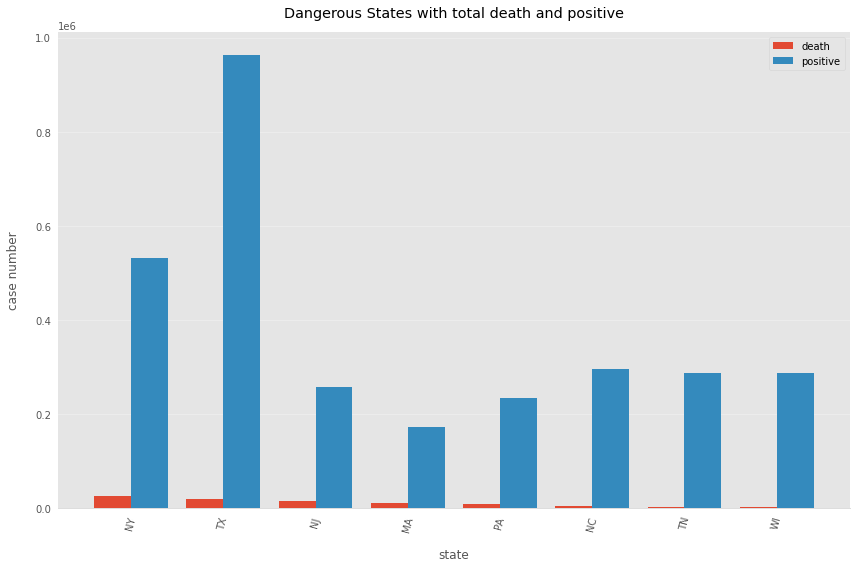

In [14]:
# Create a grouped bar chart with size
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(8)

# Define bar width. We need this to offset the second bar.
bar_width = 0.4

#Define two bars and the second need the offset space
b1 = ax.bar(x, height=df_visualization['death'],
            width=bar_width, label='death')
b2 = ax.bar(x + bar_width, height=df_visualization['positive'],
            width=bar_width, label='positive')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(df_visualization.index)

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('state', labelpad=15)
ax.set_ylabel('case number', labelpad=15)
ax.set_title('Dangerous States with total death and positive', pad=15)
plt.xticks(rotation=75)
fig.tight_layout()

NY and TX are the most two dangerous states now. Some states are not in the dataset, such as CA.

# Question 2: Is it New York State getting better or not?

### Import raw data to get more infomation

In [15]:
df_NY = pd.read_csv('all-states-history.csv')
df_NY.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-11-09,AK,A,84.0,84.0,0,NaN,NaN,NaN,119.0,...,767997.0,-13304,NaN,NaN,NaN,NaN,NaN,0,767997.0,-13304
1,2020-11-09,AL,A,3084.0,2865.0,0,219.0,21294.0,21294.0,1174.0,...,1406829.0,4138,NaN,NaN,66370.0,NaN,NaN,0,1406829.0,4138
2,2020-11-09,AR,A+,2108.0,1930.0,23,178.0,7496.0,7496.0,786.0,...,1436416.0,8545,NaN,21856.0,NaN,77969.0,NaN,0,1436416.0,8545
3,2020-11-09,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1768.0,0,NaN,NaN,NaN,NaN,NaN,0,1768.0,0
4,2020-11-09,AZ,A+,6164.0,5745.0,0,419.0,22211.0,22211.0,1232.0,...,1883207.0,10547,325589.0,NaN,NaN,NaN,1883207.0,10547,NaN,0


### Some Cleaning

In [16]:
df_NY = df_NY.loc[df_NY['state']=='NY'][['date', 'deathIncrease', 'positiveIncrease']]
df_NY.head()

,date,deathIncrease,positiveIncrease
37,2020-11-09,26,3144
93,2020-11-08,19,3428
149,2020-11-07,18,3587
205,2020-11-06,18,3209
261,2020-11-05,24,2997


In [17]:
df_NY.isna().sum()

date                0
deathIncrease       0
positiveIncrease    0
dtype: int64

In [18]:
df_NY.duplicated().sum()

0

In [19]:
df_NY.describe()

,deathIncrease,positiveIncrease
count,251.000000,251.000000
mean,103.478088,2120.215139
std,195.598923,2556.026260
min,0.000000,0.000000
25%,6.000000,675.500000
50%,12.000000,918.000000
75%,79.000000,2247.000000
max,951.000000,11571.000000


### Visualization

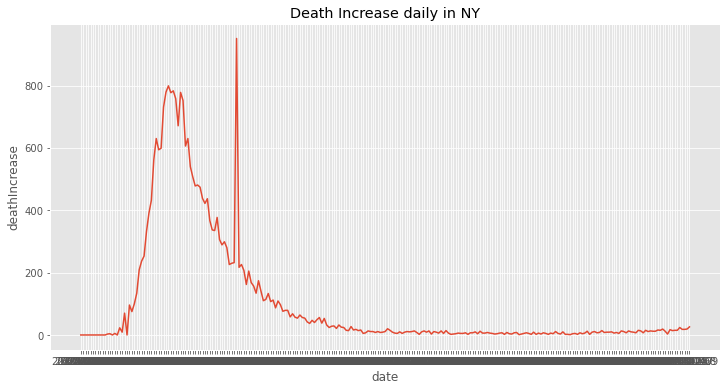

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(df_NY['date'], df_NY['deathIncrease'])
plt.title('Death Increase daily in NY')
plt.show()

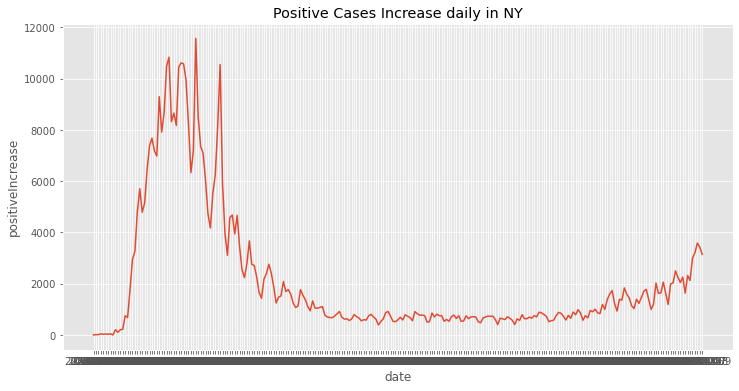

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(df_NY['date'], df_NY['positiveIncrease'])
plt.title('Positive Cases Increase daily in NY')
plt.show()

NY state now look more stable and still have a risk rebound from the daily positive cases increasing graph